# Previsão de notas dos alunos
Muitos alunos de pós-graduação têm dificuldade em obter boas notas porque não recebem muito apoio nos cursos superiores em comparação com o apoio que os alunos recebem nas escolas. Alguns alunos precisam de muita atenção dos instrutores para que obtenham boas notas, sem isso, o estado emocional do aluno pode ser prejudicial para a sua carreira a longo prazo.

**O objetivo desse projeto é, através do aprendizado de máquina, prever as notas dos alunos para que os instrutores possam ajudar os alunos a se prepararem para tópicos em que as notas dos alunos foram previstas baixas.**  



https://www.kaggle.com/code/ramontanoeiro/student-performance/notebook

# #5 - Resultados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Algoritmos escolhido ao fim da avaliação dos algoritmos
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

import pandas as pd
import numpy as np
import math
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
path_datasets = '/content/drive/MyDrive/Machine Learning e Data Science com Python/Projeto - Nota dos Alunos/'

## Carregando datasets

In [ ]:
with open(path_datasets+'students_data_2.pkl', 'rb') as f:
  [X_train, X_MA_train, X_MMA_train,
   X_test , X_MA_test , X_MMA_test ,

   X_forest_train, X_forest_test,
   X_xgbr_train, X_xgbr_test,
   X_tree_train, X_tree_test,
   X_svm_lin_train, X_svm_lin_test,
   
   y_train, y_test] = pkl.load(f)

In [ ]:
print('Base de dados para usar o algoritmo SVM Linear')
print(X_svm_lin_train.shape, X_svm_lin_test.shape)
print('Base de dados para usar o algoritmo Decision Tree')
print(X_tree_train.shape, X_tree_test.shape)
print('Target')
print(y_train.shape, y_test.shape)

Base de dados para usar o algoritmo SVM Linear
(296, 1) (99, 1)
Base de dados para usar o algoritmo Decision Tree
(296, 2) (99, 2)
Target
(296,) (99,)


In [ ]:
def get_cm(df, confusion_matrix):
  TP = df[ df[confusion_matrix] == 'TP'].count()[0]
  FP = df[ df[confusion_matrix] == 'FP'].count()[0]
  TN = df[ df[confusion_matrix] == 'TN'].count()[0]
  FN = df[ df[confusion_matrix] == 'FN'].count()[0]
  return TP, FP, TN, FN

## Testando os modelo SVM Linear
O SVM Linear obteve os melhores resultados nas etapas de avaliação de algoritmos.

In [ ]:
model = SVR(C = 1.2, gamma = 'auto', kernel = 'linear', tol = 0.0001)
model.fit(X_svm_lin_train, y_train)

y_pred = model.predict(X_svm_lin_test)

### Resultados

In [ ]:
MAE  = mean_absolute_error(y_test, y_pred)
MSE  = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [ ]:
print(f'Em média, o algoritmo SVM Linear erra a nota dos alunos em {round(MAE, 2)} pontos')
print(f'MSE: {round(MSE, 2)} | RMSE: {round(RMSE, 2)}')

Em média, o algoritmo SVM Linear erra a nota dos alunos em 1.21 pontos
MSE: 5.89 | RMSE: 2.43


In [ ]:
data = []
for t, p in zip(y_test.array, y_pred):
  data.append( (int(t), int(p)) )

df = pd.DataFrame(data, columns = ('Test', 'Pred'))
df.head()

,Test,Pred
0,0,10
1,7,6
2,9,6
3,6,4
4,12,12


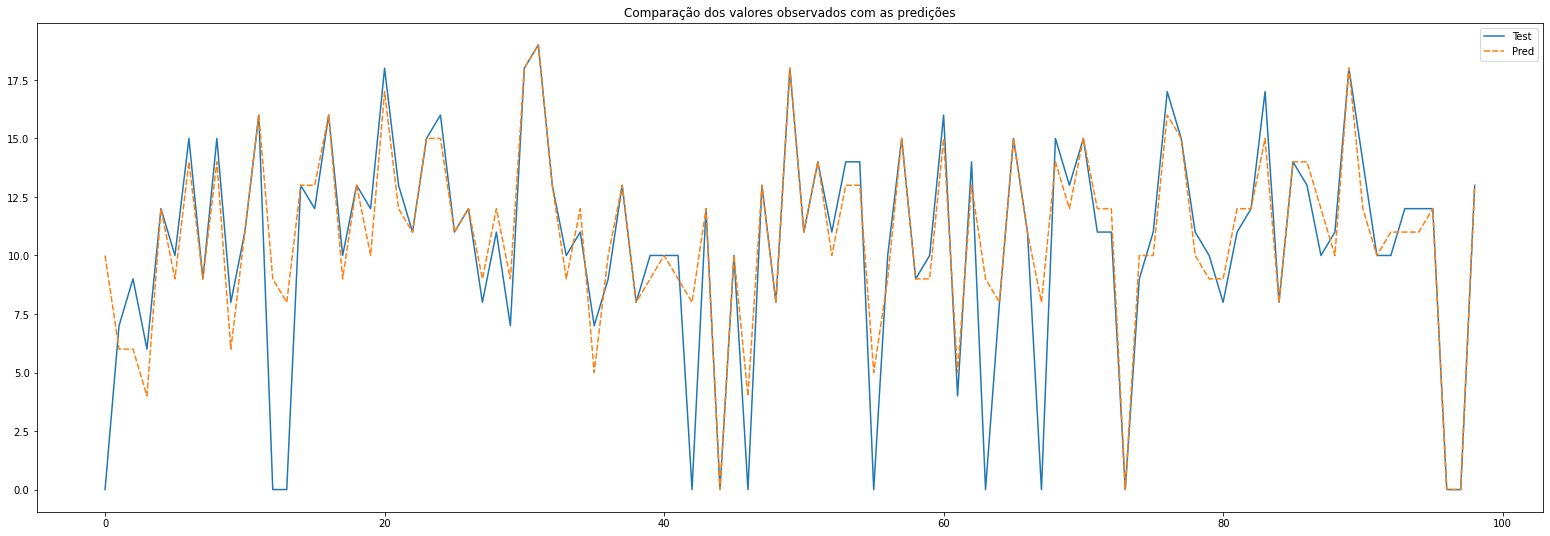

In [ ]:
plt.figure(figsize = (27, 9))
plt.title('Comparação dos valores observados com as predições')
sns.lineplot(data=df);

**Considerando que o aluno precisa de ao menos 14 pontos (70% da nota) para ser aprovado no G3**

- **TP**: modelo indica que o aluno pontuará < 14pts e o aluno pontua < 14pts **(objetivo)**
- **FP**: modelo indica que o aluno pontuará < 14pts e o aluno pontua >= 14pts
- **TN**: modelo indica que o aluno pontuará >= 14pts e o aluno pontua >= 14pts
- **FN**: modelo indica que o aluno pontuará >= 14pts e o aluno pontua < 14pts **(evitar)**

In [ ]:
confusion_matrix = []
for t, p in df.values:
  confusion_matrix.append( 'TP' if (p < 14 and t < 14) else 'FP' if (p < 14 and t >= 14) else 'TN' if (p >= 14 and t >= 14) else 'FN' if (p >= 14 and t < 14) else None) 
df['CM1'] = confusion_matrix
df.head(15)

,Test,Pred,CM1
0,0,10,TP
1,7,6,TP
2,9,6,TP
3,6,4,TP
4,12,12,TP
5,10,9,TP
6,15,14,TN
7,9,9,TP
8,15,14,TN
9,8,6,TP


In [ ]:
TP, FP, TN, FN = get_cm(df, 'CM1')
TP, FP, TN, FN

(73, 4, 21, 1)

In [ ]:
precision = round( (TP/(TP+FP))*100, 2 )
recall    = round( (TP/(TP+FN))*100, 2 )

In [ ]:
print(f'Quando o modelo previu que o aluno pontuaria uma nota baixa, ele estava correto em {precision}%')
print(f'Quando o aluno pontuou nota baixa, o modelo conseguiu prever {recall}% dos casos')

Quando o modelo previu que o aluno pontuaria uma nota baixa, ele estava correto em 94.81%
Quando o aluno pontuou nota baixa, o modelo conseguiu prever 98.65% dos casos


### Resultado dos alunos que pontuaram <=30% (6 pontos)

- **TP**: modelo indica que o aluno pontuará <= 6pts e o aluno pontua <= 6pts **(objetivo)**
- **FP**: modelo indica que o aluno pontuará <= 6pts e o aluno pontua > 6pts
- **TN**: modelo indica que o aluno pontuará > 6pts e o aluno pontua > 6pts
- **FN**: modelo indica que o aluno pontuará > 6pts e o aluno pontua <= 6pts **(evitar)**

In [ ]:
confusion_matrix = []
for t, p in df[['Test', 'Pred']].values:
  confusion_matrix.append( 'TP' if (p <= 6 and t <= 6) else 'FP' if (p <= 6 and t > 6) else 'TN' if (p > 6 and t > 6) else 'FN' if (p > 6 and t <= 6) else None) 
df['CM2'] = confusion_matrix
df.head(15)

,Test,Pred,CM1,CM2
0,0,10,TP,FN
1,7,6,TP,FP
2,9,6,TP,FP
3,6,4,TP,TP
4,12,12,TP,TN
5,10,9,TP,TN
6,15,14,TN,TN
7,9,9,TP,TN
8,15,14,TN,TN
9,8,6,TP,FP


In [ ]:
TP, FP, TN, FN = get_cm(df[ df['Test'] <= 6 ], 'CM2')
TP, FP, TN, FN

(8, 0, 0, 6)

In [ ]:
precision = round( (TP/(TP+FP))*100, 2 )
recall    = round( (TP/(TP+FN))*100, 2 )

In [ ]:
print(f'Quando o modelo previu que o aluno pontuaria uma nota muito baixa (<=6), ele estava correto em {precision}%')
print(f'Quando o aluno pontuou nota muito baixa (<=6), o modelo conseguiu prever {recall}% dos casos')

Quando o modelo previu que o aluno pontuaria uma nota muito baixa (<=6), ele estava correto em 100.0%
Quando o aluno pontuou nota muito baixa (<=6), o modelo conseguiu prever 57.14% dos casos


## Testando os modelo Decision Tree
O Decision Tree obteve o segundo melhor resultado nas etapas de avaliação de algoritmos.

In [ ]:
model   = DecisionTreeRegressor(criterion =  'absolute_error', max_features = 'log2', min_samples_leaf =  5, min_samples_split = 2, splitter = 'best')
model.fit(X_tree_train, y_train)

y_pred = model.predict(X_tree_test)

### Resultados

In [ ]:
MAE  = mean_absolute_error(y_test, y_pred)
MSE  = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [ ]:
print(f'Em média, o algoritmo Decision Tree erra a nota dos alunos em {round(MAE, 2)} pontos')
print(f'MSE: {round(MSE, 2)} | RMSE: {round(RMSE, 2)}')

Em média, o algoritmo Decision Tree erra a nota dos alunos em 1.86 pontos
MSE: 8.44 | RMSE: 2.91


In [ ]:
data = []
for t, p in zip(y_test.array, y_pred):
  data.append( (int(t), int(p)) )

df = pd.DataFrame(data, columns = ('Test', 'Pred'))
df.head()

,Test,Pred
0,0,10
1,7,8
2,9,7
3,6,10
4,12,14


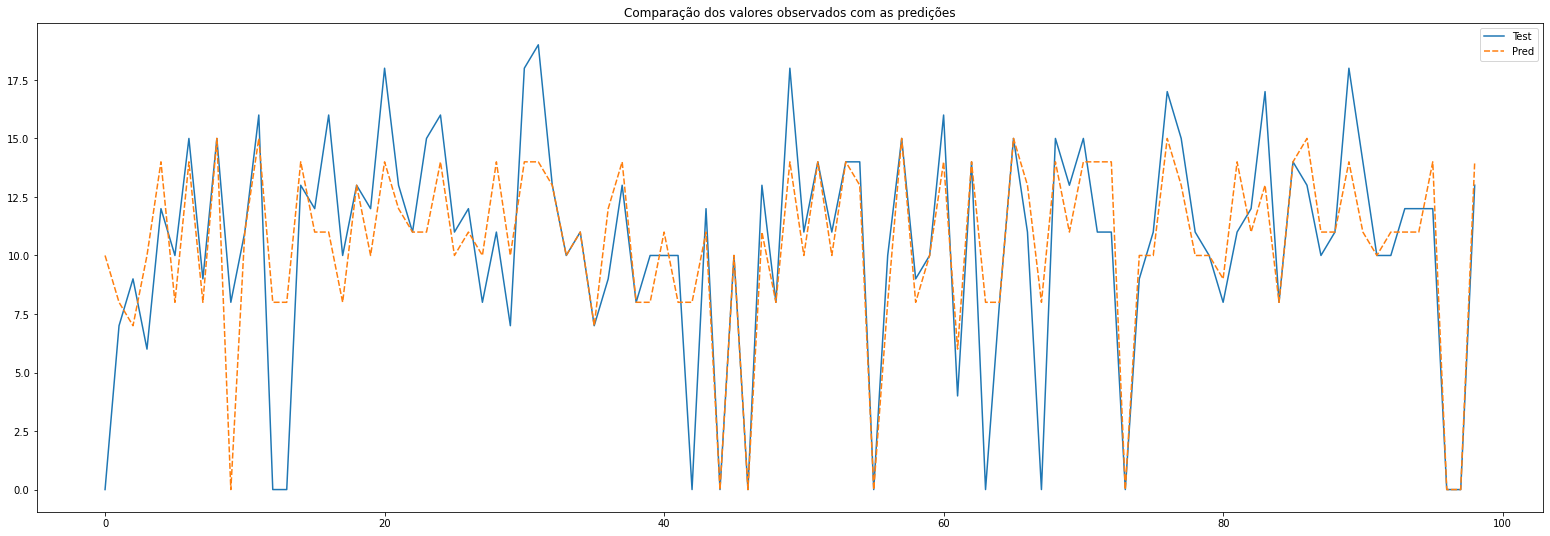

In [ ]:
plt.figure(figsize = (27, 9))
plt.title('Comparação dos valores observados com as predições')
sns.lineplot(data=df);

**Considerando que o aluno precisa de ao menos 14 pontos (70% da nota) para ser aprovado no G3**

- **TP**: modelo indica que o aluno pontuará < 14pts e o aluno pontua < 14pts **(objetivo)**
- **FP**: modelo indica que o aluno pontuará < 14pts e o aluno pontua >= 14pts
- **TN**: modelo indica que o aluno pontuará >= 14pts e o aluno pontua >= 14pts
- **FN**: modelo indica que o aluno pontuará >= 14pts e o aluno pontua < 14pts **(evitar)**

In [ ]:
confusion_matrix = []
for t, p in df.values:
  confusion_matrix.append( 'TP' if (p < 14 and t < 14) else 'FP' if (p < 14 and t >= 14) else 'TN' if (p >= 14 and t >= 14) else 'FN' if (p >= 14 and t < 14) else None) 
df['CM1'] = confusion_matrix
df.head(15)

,Test,Pred,CM1
0,0,10,TP
1,7,8,TP
2,9,7,TP
3,6,10,TP
4,12,14,FN
5,10,8,TP
6,15,14,TN
7,9,8,TP
8,15,15,TN
9,8,0,TP


In [ ]:
TP, FP, TN, FN = get_cm(df, 'CM1')
TP, FP, TN, FN

(64, 6, 19, 10)

In [ ]:
precision = round( (TP/(TP+FP))*100, 2 )
recall    = round( (TP/(TP+FN))*100, 2 )

In [ ]:
print(f'Quando o modelo previu que o aluno pontuaria uma nota baixa, ele estava correto em {precision}%')
print(f'Quando o aluno pontuou nota baixa, o modelo conseguiu prever {recall}% dos casos')

Quando o modelo previu que o aluno pontuaria uma nota baixa, ele estava correto em 91.43%
Quando o aluno pontuou nota baixa, o modelo conseguiu prever 86.49% dos casos


### Resultado dos alunos que pontuaram <=30% (6 pontos)

- **TP**: modelo indica que o aluno pontuará <= 6pts e o aluno pontua <= 6pts **(objetivo)**
- **FP**: modelo indica que o aluno pontuará <= 6pts e o aluno pontua > 6pts
- **TN**: modelo indica que o aluno pontuará > 6pts e o aluno pontua > 6pts
- **FN**: modelo indica que o aluno pontuará > 6pts e o aluno pontua <= 6pts **(evitar)**

In [ ]:
confusion_matrix = []
for t, p in df[['Test', 'Pred']].values:
  confusion_matrix.append( 'TP' if (p <= 6 and t <= 6) else 'FP' if (p <= 6 and t > 6) else 'TN' if (p > 6 and t > 6) else 'FN' if (p > 6 and t <= 6) else None) 
df['CM2'] = confusion_matrix
df.head(15)

,Test,Pred,CM1,CM2
0,0,10,TP,FN
1,7,8,TP,TN
2,9,7,TP,TN
3,6,10,TP,FN
4,12,14,FN,TN
5,10,8,TP,TN
6,15,14,TN,TN
7,9,8,TP,TN
8,15,15,TN,TN
9,8,0,TP,FP


In [ ]:
TP, FP, TN, FN = get_cm(df[ df['Test'] <= 6 ], 'CM2')
TP, FP, TN, FN

(7, 0, 0, 7)

In [ ]:
precision = round( (TP/(TP+FP))*100, 2 )
recall    = round( (TP/(TP+FN))*100, 2 )

In [ ]:
print(f'Quando o modelo previu que o aluno pontuaria uma nota muito baixa (<=6), ele estava correto em {precision}%')
print(f'Quando o aluno pontuou nota muito baixa (<=6), o modelo conseguiu prever {recall}% dos casos')

Quando o modelo previu que o aluno pontuaria uma nota muito baixa (<=6), ele estava correto em 100.0%
Quando o aluno pontuou nota muito baixa (<=6), o modelo conseguiu prever 50.0% dos casos
